In [34]:
import numpy as np
import matplotlib.pyplot as plt

# matplotlib parameters 
large = 40; med = 20; small = 20
params = {'axes.titlesize': med,
          'axes.titlepad' : med,
          'legend.fontsize': med,
          'axes.labelsize': med ,
          'axes.titlesize': med ,
          'xtick.labelsize': med ,
          'ytick.labelsize': med ,
          'figure.titlesize': med}
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["font.serif"] = ["Helvetica Neue"]          
#plt.rcParams['text.usetex'] = True # need LaTeX. Change it to False if LaTeX is not installed in the system
plt.rcParams.update(params)

In [35]:
from itertools import product
from functools import reduce
from scipy.sparse import identity, csr_matrix, kron

class PauliHamiltonian:
    def __init__(self, L, random_coefficients):
        """
        Initialize the PauliHamiltonian class.

        Parameters:
        L (int): Number of qubits.
        random_coefficients (numpy.ndarray): Array of random coefficients for each Pauli string.
        """
        self.L = L
        self.random_coefficients = random_coefficients
        self.paulis = ['I', 'X', 'Y', 'Z']  # Pauli operators
        self.pauli_strings = self.generate_pauli_strings()  # Generate all possible Pauli strings

    def pauli_matrix(self, p):
        """
        Return the matrix representation of a given Pauli operator.

        Parameters:
        p (str): Pauli operator ('I', 'X', 'Y', 'Z').

        Returns:
        scipy.sparse.csr_matrix: Sparse matrix representation of the Pauli operator.
        """
        if p == "I":
            return identity(2, format="csr")  # Identity matrix
        elif p == "X":
            return csr_matrix([[0, 1], [1, 0]], dtype=complex)  # Pauli-X matrix
        elif p == "Y":
            return csr_matrix([[0, -1j], [1j, 0]], dtype=complex)  # Pauli-Y matrix
        elif p == "Z":
            return csr_matrix([[1, 0], [0, -1]], dtype=complex)  # Pauli-Z matrix
        else:
            raise ValueError(f"Invalid Pauli operator: {p}")

    def tensor_product(self, pauli_string):
        """
        Compute the tensor product of a given Pauli string.

        Parameters:
        pauli_string (str): A string of Pauli operators (e.g., 'IXYZ').

        Returns:
        scipy.sparse.csr_matrix: Sparse matrix representation of the tensor product.
        """
        matrices = [self.pauli_matrix(p) for p in pauli_string]  # Convert each Pauli operator to its matrix
        return reduce(kron, matrices)  # Compute the tensor product of all matrices

    def generate_pauli_strings(self):
        """
        Generate all possible Pauli strings of length L.

        Returns:
        list: List of all Pauli strings (e.g., ['IIII', 'IIIX', ..., 'ZZZZ']).
        """
        return [''.join(p_string) for p_string in product(self.paulis, repeat=self.L)]

    def hamiltonian_matrix(self):
        """
        Construct the Hamiltonian matrix for the system.

        Returns:
        scipy.sparse.csr_matrix: Sparse matrix representation of the Hamiltonian.
        """
        dim = 2 ** self.L  # Dimension of the Hilbert space
        total_matrix = csr_matrix((dim, dim), dtype=complex)  # Initialize an empty sparse matrix

        # Iterate over all Pauli strings and add their contributions to the Hamiltonian
        for i, pauli_str in enumerate(self.pauli_strings):
            total_matrix += self.random_coefficients[i] * self.tensor_product(pauli_str)

        return total_matrix

# All to all interacting Hamiltonian construction

In [36]:
L = 7  # Number of qubits
mu = 1.0
sigma = 0.0
num_pauli_strings = 4**L  # Total number of Pauli strings
random_coefficients = np.random.normal(mu, sigma, num_pauli_strings)

hamiltonian = PauliHamiltonian(L, random_coefficients)
H_all_to_all = hamiltonian.hamiltonian_matrix()

# Heatmap of the real and imaginary part of the Hamiltonian

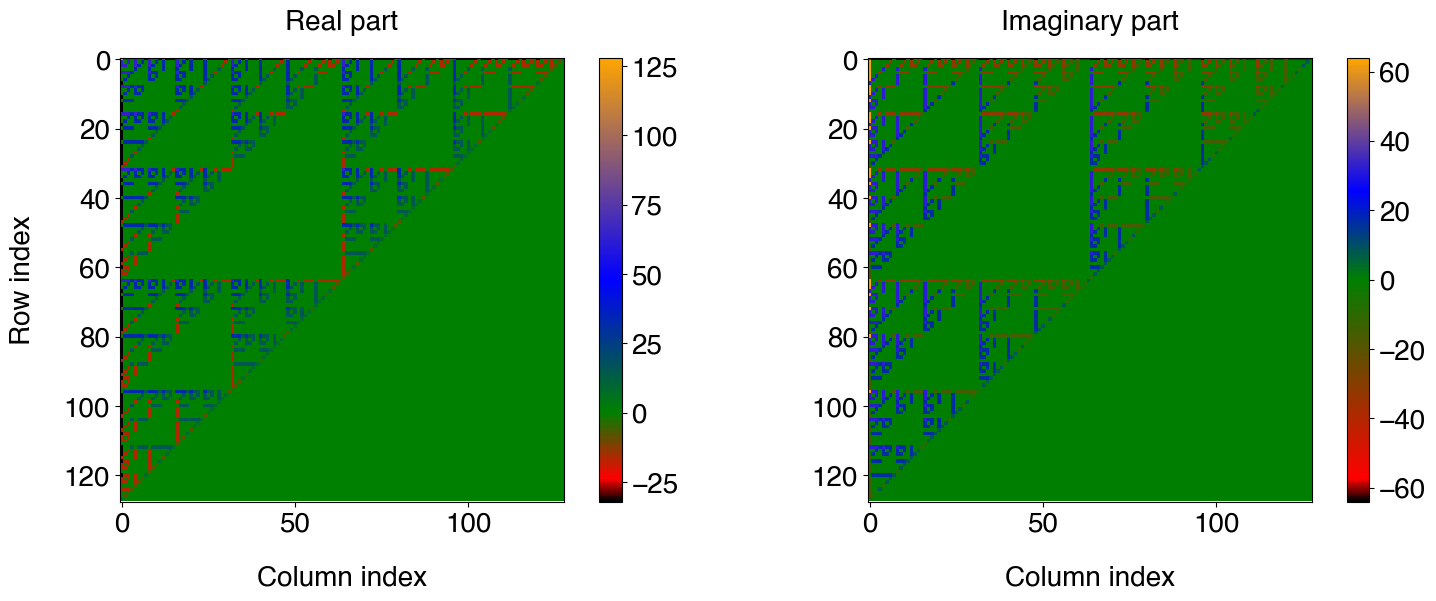

In [37]:
# Get the dense Hamiltonian matrix
H = H_all_to_all.toarray()

from matplotlib.colors import LinearSegmentedColormap
colors = ['black', 'red', 'green', 'blue', 'orange']  # Use color names instead of RGB values
positions1 = [0.0, 0.05, 0.2, 0.5, 1.0]  # Positions for each color
custom_cmap1 = LinearSegmentedColormap.from_list("custom_cmap", list(zip(positions1, colors)))
positions2 = [0.0, 0.05, 0.5, 0.7, 1.0]  # Positions for each color
custom_cmap2 = LinearSegmentedColormap.from_list("custom_cmap", list(zip(positions2, colors)))

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
im_real = axs[0].imshow(H.real, cmap=custom_cmap1)
axs[0].set_title("Real part")
axs[0].set_xlabel("Column index", labelpad=20)
axs[0].set_ylabel("Row index", labelpad=20)
fig.colorbar(im_real, ax=axs[0])

im_imag = axs[1].imshow(H.imag, cmap=custom_cmap2)
axs[1].set_title("Imaginary part")
axs[1].set_xlabel("Column index", labelpad=20)
fig.colorbar(im_imag, ax=axs[1])
plt.tight_layout()
plt.subplots_adjust(wspace=0.05)  # Lower the horizontal space between the plots
plt.show()

# Real Hamiltonian matrix

In [38]:
class PauliHamiltonian:
    def __init__(self, L, random_coefficients):
        """
        Initialize the PauliHamiltonian class.

        Parameters:
        L (int): Number of qubits.
        random_coefficients (numpy.ndarray): Array of random coefficients for each Pauli string.
        """
        self.L = L
        self.random_coefficients = random_coefficients
        self.paulis = ['I', 'X', 'Z']  # Pauli operators
        self.pauli_strings = self.generate_pauli_strings()  # Generate all possible Pauli strings

    def pauli_matrix(self, p):
        """
        Return the matrix representation of a given Pauli operator.

        Parameters:
        p (str): Pauli operator ('I', 'X', 'Y', 'Z').

        Returns:
        scipy.sparse.csr_matrix: Sparse matrix representation of the Pauli operator.
        """
        if p == "I":
            return identity(2, format="csr")  # Identity matrix
        elif p == "X":
            return csr_matrix([[0, 1], [1, 0]], dtype=complex)  # Pauli-X matrix
        elif p == "Y":
            return csr_matrix([[0, -1j], [1j, 0]], dtype=complex)  # Pauli-Y matrix
        elif p == "Z":
            return csr_matrix([[1, 0], [0, -1]], dtype=complex)  # Pauli-Z matrix
        else:
            raise ValueError(f"Invalid Pauli operator: {p}")

    def tensor_product(self, pauli_string):
        """
        Compute the tensor product of a given Pauli string.

        Parameters:
        pauli_string (str): A string of Pauli operators (e.g., 'IXYZ').

        Returns:
        scipy.sparse.csr_matrix: Sparse matrix representation of the tensor product.
        """
        matrices = [self.pauli_matrix(p) for p in pauli_string]  # Convert each Pauli operator to its matrix
        return reduce(kron, matrices)  # Compute the tensor product of all matrices

    def generate_pauli_strings(self):
        """
        Generate all possible Pauli strings of length L.

        Returns:
        list: List of all Pauli strings (e.g., ['IIII', 'IIIX', ..., 'ZZZZ']).
        """
        return [''.join(p_string) for p_string in product(self.paulis, repeat=self.L)]

    def hamiltonian_matrix(self):
        """
        Construct the Hamiltonian matrix for the system.

        Returns:
        scipy.sparse.csr_matrix: Sparse matrix representation of the Hamiltonian.
        """
        dim = 2 ** self.L  # Dimension of the Hilbert space
        total_matrix = csr_matrix((dim, dim), dtype=complex)  # Initialize an empty sparse matrix

        # Iterate over all Pauli strings and add their contributions to the Hamiltonian
        for i, pauli_str in enumerate(self.pauli_strings):
            total_matrix += self.random_coefficients[i] * self.tensor_product(pauli_str)

        return total_matrix

In [39]:
L = 7  # Number of qubits
mu = 1.0
sigma = 0.0
num_pauli_strings = 4**L  # Total number of Pauli strings
random_coefficients = np.random.normal(mu, sigma, num_pauli_strings)

hamiltonian = PauliHamiltonian(L, random_coefficients)
H_all_to_all = hamiltonian.hamiltonian_matrix()

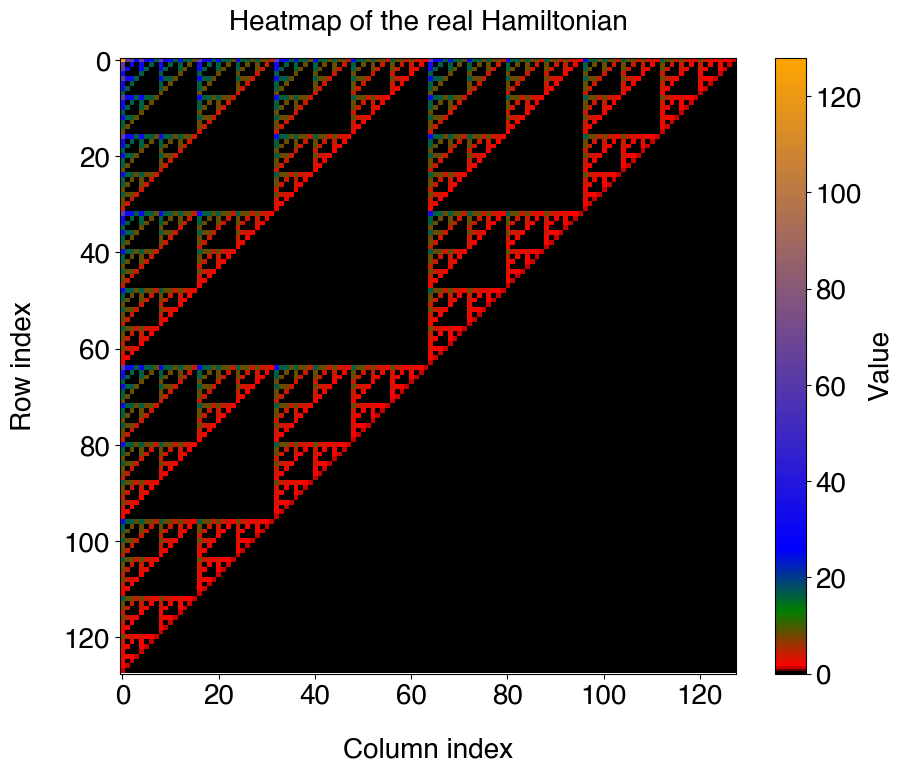

In [40]:
H = H_all_to_all.toarray()

from matplotlib.colors import LinearSegmentedColormap
colors = ['black', 'red', 'green', 'blue', 'orange']  # Use color names instead of RGB values
positions1 = [0.0, 0.01, 0.1, 0.2, 1.0]  # Positions for each color
custom_cmap1 = LinearSegmentedColormap.from_list("custom_cmap", list(zip(positions1, colors)))

plt.figure(figsize=(10, 8))
plt.imshow(np.abs(H), cmap=custom_cmap1)
plt.title("Heatmap of the real Hamiltonian")
plt.xlabel("Column index", labelpad=20)
plt.ylabel("Row index", labelpad=20)
plt.colorbar(label="Value")
plt.show()